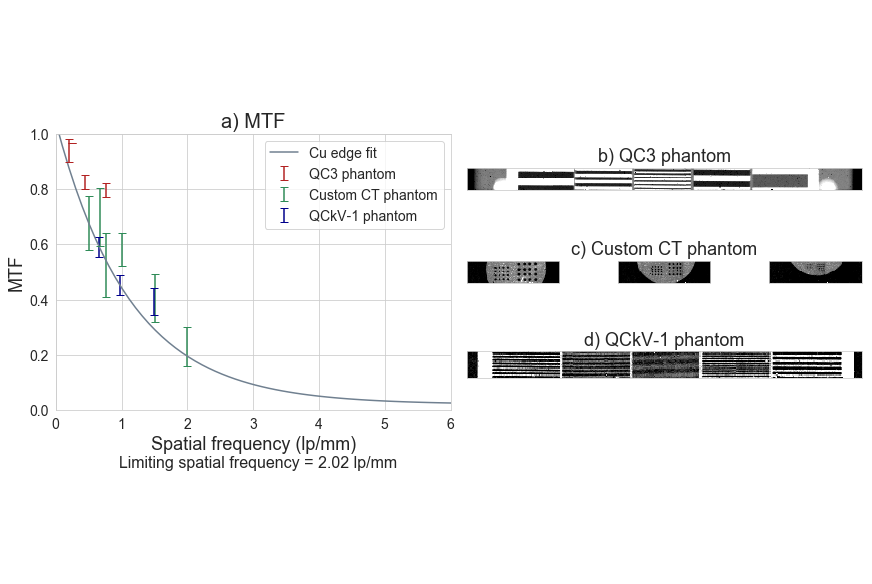

In [248]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\AAPM21'
mtf_res = np.load(directory + r'\Radiographs\Two\resolution_piece_40kVp_analyzed\mtf.npy')
mtf_kv = np.load(directory + r'\Radiographs\Two\Stationary_kV_analyzed\phantom_scan\mtf.npy')
mtf_mv = np.load(directory + r'\Radiographs\Two\Stationary_MV_analyzed\phantom_scan\mtf.npy')

mtf_edge = np.load(directory + r'\ESF\mtf_edge.npy')

kv = np.load(directory + r'\Radiographs\Two\Stationary_kV_analyzed\phantom_scan\Data\data_corr.npy')
mv = np.load(directory + r'\Radiographs\Two\Stationary_MV_analyzed\phantom_scan\Data\data_corr.npy')
ct_large = np.load(directory + r'\Radiographs\Two\resolution_piece_40kVp_analyzed\large\Data\data_corr.npy')
ct_mid = np.load(directory + r'\Radiographs\Two\resolution_piece_40kVp_analyzed\middle\Data\data_corr.npy')
ct_small = np.load(directory + r'\Radiographs\Two\resolution_piece_40kVp_analyzed\small_1\Data\data_corr.npy')

# Find limit
idx = np.abs(mtf_edge[1] - 0.2).argmin()
lim = mtf_edge[0][idx]

widths = [1.5, 1.5, 1.5, 1, 1, 1]
heights = [0.5, 0.5, 0.5]

fig1 = plt.figure(constrained_layout=True, figsize=(12, 8))
c = 6
gs1 = fig1.add_gridspec(5, c)#, width_ratios=widths, height_ratios=heights)
f1ax1 = fig1.add_subplot(gs1[1:4, 0:c-3])

f1ax1.plot(mtf_edge[0],mtf_edge[1], color='slategray')
f1ax1.errorbar(mtf_mv[0], mtf_mv[1], yerr=mtf_mv[2], capsize=4, fmt='none', color='firebrick')
f1ax1.errorbar(mtf_res[0], mtf_res[1], yerr=mtf_res[2], capsize=4, fmt='none', color='seagreen')
f1ax1.errorbar(mtf_kv[0], mtf_kv[1], yerr=mtf_kv[2], capsize=4, fmt='none', color='darkblue')
f1ax1.legend(['Cu edge fit', 'QC3 phantom', 'Custom CT phantom', 'QCkV-1 phantom'], fontsize=14)
f1ax1.set_title('a) MTF', fontsize=20)
f1ax1.set_ylabel('MTF', fontsize=18)
f1ax1.set_xlabel('Spatial frequency (lp/mm)', fontsize=18)
f1ax1.set_ylim([0, 1])
f1ax1.set_xlim([0, 6])
f1ax1.annotate(f'Limiting spatial frequency = {lim:0.2f} lp/mm', (0.16, -0.19),
               xycoords='axes fraction', va='center', fontsize=16)
f1ax1.tick_params(labelsize=14)

f1ax2 = fig1.add_subplot(gs1[1, c-3:])
f1ax2.imshow(mv[:, 50:480, 6], cmap='gray', vmin=1, vmax=3)
f1ax2.axes.xaxis.set_ticks([])
f1ax2.axes.yaxis.set_ticks([])
f1ax2.set_title('b) QC3 phantom', fontsize=18)
f1ax2.grid(False)

f1ax3 = fig1.add_subplot(gs1[2, c-3])
f1ax3.imshow(ct_large[:, 115:215, 6], cmap='gray', vmin=0, vmax=0.2)
f1ax3.axes.xaxis.set_ticks([])
f1ax3.axes.yaxis.set_ticks([])
f1ax3.grid(False)

f1ax4 = fig1.add_subplot(gs1[2, c-2])
f1ax4.imshow(ct_mid[:, 110:210, 6], cmap='gray', vmin=0, vmax=0.2)
f1ax4.axes.xaxis.set_ticks([])
f1ax4.axes.yaxis.set_ticks([])
f1ax4.set_title('c) Custom CT phantom', fontsize=18)
f1ax4.grid(False)

f1ax5 = fig1.add_subplot(gs1[2, c-1])
f1ax5.imshow(ct_small[:, 120:220, 6], cmap='gray', vmin=0, vmax=0.2)
f1ax5.axes.xaxis.set_ticks([])
f1ax5.axes.yaxis.set_ticks([])
f1ax5.grid(False)

f1ax6 = fig1.add_subplot(gs1[3, c-3:])
f1ax6.imshow(kv[:, 50:400, 6], cmap='gray', vmin=0.75, vmax=2)
f1ax6.axes.xaxis.set_ticks([])
f1ax6.axes.yaxis.set_ticks([])
f1ax6.set_title('d) QCkV-1 phantom', fontsize=18)
f1ax6.grid(False)

plt.show()
fig1.savefig(r'D:\OneDrive - University of Victoria\Files\Grad School\Writings and Presentations\Abstracts\AAPM 2021\figure1.png', dpi=500)

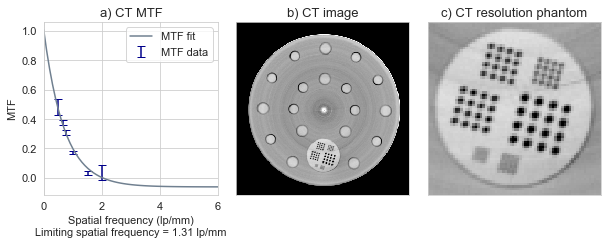

In [308]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\AAPM21\CT Resolution\Two'
data = np.load(directory + r'\CT_mtf_data_2.npy')
fit = np.load(directory + r'\CT_mtf_fit_2.npy')
ct = np.load(directory + r'\CT_norm_2.npy')

# Find limit
idx = np.abs(fit[1] - 0.1).argmin()
ct_lim = fit[0][idx]

fig2, ax2 = plt.subplots(1, 3, figsize=(10, 5))
ax2[0].errorbar(data[0], data[1], yerr=data[2]*2, capsize=4, fmt='none', color='darkblue')
ax2[0].plot(fit[0], fit[1], color='slategray')
ax2[0].set_title('a) CT MTF', fontsize=13)
ax2[0].set_ylabel('MTF', fontsize=11)
ax2[0].set_xlabel('Spatial frequency (lp/mm)', fontsize=11)
ax2[0].set_xlim([0, 6])
ax2[0].legend(['MTF fit', 'MTF data'], fontsize=11)
ax2[0].annotate(f'Limiting spatial frequency = {ct_lim:0.2f} lp/mm', (-0.05, -0.22),
               xycoords='axes fraction', va='center', fontsize=11)
ax2[0].tick_params(labelsize=11)

ax2[1].imshow(ct[13, 120:450, 120:450], vmin=-800, vmax=200, cmap='gray')
ax2[1].axes.xaxis.set_ticks([])
ax2[1].axes.yaxis.set_ticks([])
ax2[1].grid(False)
ax2[1].set_title('b) CT image', fontsize=13)

ax2[2].imshow(ct[13, 340:410, 252:322], vmin=-800, vmax=200, cmap='gray')
ax2[2].axes.xaxis.set_ticks([])
ax2[2].axes.yaxis.set_ticks([])
ax2[2].grid(False)
ax2[2].set_title('c) CT resolution phantom', fontsize=13)

fig2.subplots_adjust(wspace=0.1, bottom=0.4)
fig2.show()

fig2.savefig(r'D:\OneDrive - University of Victoria\Files\Grad School\Writings and Presentations\Abstracts\AAPM 2021\figure2.png', dpi=500)

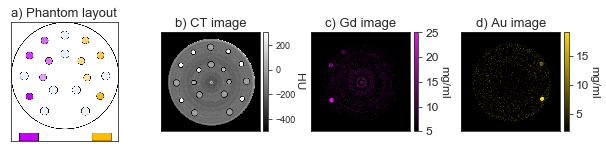

In [361]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Create the colormaps
nbins = 100
c1 = (1, 0, 1)
c3 = (1, 0.843, 0)

gray_val = 0
gray_list = (gray_val, gray_val, gray_val)

# Create cmaps
c1_rng = [gray_list, c1]
cmap1 = colors.LinearSegmentedColormap.from_list('Purp', c1_rng, N=nbins)
c2_rng = [gray_list, c3]
cmap2 = colors.LinearSegmentedColormap.from_list('G78', c2_rng, N=nbins)

# Create mask to set values to zero outside of the phantom
# Create meshgrid of values from 0 to img_dim in both dimension
xx, yy, = np.mgrid[:576, :576]

# Define the equation of the circle that we would like to create
circle = (xx - 288)**2 + (yy - 288)**2
arr = np.ones((576, 576))
mask = np.ma.masked_where(circle > 130**2, arr)
mask = mask.mask

sns.set_style('white')
img = mpimg.imread(r'D:\OneDrive - University of Victoria\Files\Grad School\Writings and Presentations\Abstracts\AAPM 2021\combined_phantom.png')
directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\21-03-03_CT_GdAu_SEC\phantom_scan\Norm CT'

ct = np.load(os.path.join(directory, 'CT_norm.npy'))
gd = np.load(os.path.join(directory, 'K-edge.npy'))
au = np.load(os.path.join(directory, 'K-edge_2.npy'))

for i in range(24):
    gd[i][mask] = 0
    au[i][mask] = 0

fig3, ax3 = plt.subplots(1, 4, figsize=(10, 6))
ax3[0].imshow(img)
ax3[0].axes.xaxis.set_ticks([])
ax3[0].axes.yaxis.set_ticks([])
ax3[0].grid(False)
ax3[0].set_title('a) Phantom layout', fontsize=13)

d1 = make_axes_locatable(ax3[1])
d2 = make_axes_locatable(ax3[2])
d3 = make_axes_locatable(ax3[3])


im1 = ax3[1].imshow(ct[13, 120:450, 120:450], cmap='gray', vmin=-500, vmax=300)
ax3[1].axes.xaxis.set_ticks([])
ax3[1].axes.yaxis.set_ticks([])
ax3[1].grid(False)
ax3[1].set_title('b) CT image', fontsize=13)
cax1 = d1.append_axes("right", size="5%", pad=0.05)
cax1.tick_params(labelsize=9)
plt.colorbar(im1, cax=cax1)
h1 = cax1.set_ylabel('HU', fontsize=12, labelpad=9)
h1.set_rotation(-90)

im2 = ax3[2].imshow(gd[8, 120:450, 120:450], cmap=cmap1, vmin=5, vmax=25)
ax3[2].axes.xaxis.set_ticks([])
ax3[2].axes.yaxis.set_ticks([])
ax3[2].grid(False)
ax3[2].set_title('c) Gd image', fontsize=13)
cax2 = d2.append_axes("right", size="5%", pad=0.05)
cax2.tick_params(labelsize=12)
plt.colorbar(im2, cax=cax2)
h2 = cax2.set_ylabel('mg/ml', fontsize=12, labelpad=10)
h2.set_rotation(-90)

im3 = ax3[3].imshow(au[11, 120:450, 120:450], cmap=cmap2, vmin=2, vmax=19)
ax3[3].axes.xaxis.set_ticks([])
ax3[3].axes.yaxis.set_ticks([])
ax3[3].grid(False)
ax3[3].set_title('d) Au image', fontsize=13)
cax3 = d3.append_axes("right", size="5%", pad=0.05)
cax3.tick_params(labelsize=12)
plt.colorbar(im3, cax=cax3)
h3 = cax3.set_ylabel('mg/ml', fontsize=12, labelpad=10)
h3.set_rotation(-90)

fig3.subplots_adjust(wspace=0.4)

fig3.show()
fig3.savefig(r'D:\OneDrive - University of Victoria\Files\Grad School\Writings and Presentations\Abstracts\AAPM 2021\figure3.png', dpi=500)

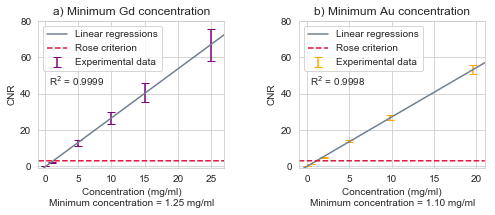

In [368]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns

sns.set_style('whitegrid')
directory = r'D:\OneDrive - University of Victoria\Research\LDA Data\21-03-03_CT_GdAu_SEC\phantom_scan'

gd_conc = np.array([25, 15, 10, 5, 1, 0])
au_conc = np.array([19.67, 9.835, 4.9175, 1.967, 0.49175, 0])

cnr_gd = np.load(os.path.join(directory, 'CNR_Gd.npy'))[:, 1]
cnr_au = np.load(os.path.join(directory, 'CNR_Au.npy'))[:, 1]

std_gd = np.std(cnr_gd, axis=0)
std_au = np.std(cnr_au, axis=0)

cnr_gd = np.mean(cnr_gd, axis=0)
cnr_au = np.mean(cnr_au, axis=0)

# Find the linear regression and detection limit

# Get the linear regressions of the Gd data
m_gd, b_gd, r2_gd, p, std = linregress(gd_conc, cnr_gd)
xpts = np.linspace(-2, 27, 5000)
ypts_gd = m_gd * xpts + b_gd

# Find the minimum Gd concentration
min_idx_gd = np.abs(ypts_gd - 3).argmin()
min_conc_gd = xpts[min_idx_gd]

# Get the linear regressions of the Au data
m_au, b_au, r2_au, p, std = linregress(au_conc, cnr_au)
ypts_au = m_au * xpts + b_au

# Find the minimum Au concentration
min_idx = np.abs(ypts_au - 3).argmin()
min_conc_au = xpts[min_idx]

fig4, ax4 = plt.subplots(1, 2, figsize=(8, 3))

ax4[0].errorbar(gd_conc, cnr_gd, yerr=std_gd, capsize=4, fmt='none', color='purple')
ax4[0].plot(xpts, ypts_gd, color='slategray')
ax4[0].plot(xpts, 3*np.ones(5000), color='crimson', ls='--')
ax4[0].set_ylim([-1, 80])
ax4[0].set_xlim([-1, 27])
ax4[0].set_title('a) Minimum Gd concentration')
ax4[0].set_xlabel('Concentration (mg/ml)')
ax4[0].set_ylabel('CNR')
ax4[0].legend(['Linear regressions', 'Rose criterion', 'Experimental data'])
ax4[0].annotate(rf'R$^2$ = {r2_gd:0.4f}', (0.06, 0.59),
               xycoords='axes fraction', va='center')
ax4[0].annotate(f'Minimum concentration = {min_conc_gd:0.2f} mg/ml', (0.06, -0.24),
               xycoords='axes fraction', va='center')

ax4[1].errorbar(au_conc, cnr_au, yerr=std_au, capsize=4, fmt='none', color='orange')
ax4[1].plot(xpts, ypts_au, color='slategray')
ax4[1].plot(xpts, 3*np.ones(5000), color='crimson', ls='--')
ax4[1].set_ylim([-1, 80])
ax4[1].set_xlim([-1, 21])
ax4[1].set_title('b) Minimum Au concentration')
ax4[1].set_xlabel('Concentration (mg/ml)')
ax4[1].set_ylabel('CNR')
ax4[1].legend(['Linear regressions', 'Rose criterion', 'Experimental data'])
ax4[1].annotate(rf'R$^2$ = {r2_au:0.4f}', (0.06, 0.59),
               xycoords='axes fraction', va='center')
ax4[1].annotate(f'Minimum concentration = {min_conc_au:0.2f} mg/ml', (0.06, -0.24),
               xycoords='axes fraction', va='center')

fig4.subplots_adjust(bottom=0.20, wspace=0.4)
fig4.show()
fig4.savefig(r'D:\OneDrive - University of Victoria\Files\Grad School\Writings and Presentations\Abstracts\AAPM 2021\figure4.png', dpi=500)
